In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
from sklearn.impute import SimpleImputer
pd.set_option('display.max_columns', None)

import datetime as dt
warnings.filterwarnings('ignore')

### Basic Understanding of Data

In [84]:
df = pd.read_csv('hotel_bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [86]:
df.isna().sum()
#To check missing values

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [87]:
df['is_canceled'].value_counts(normalize=True)
#Data set is not imbalanced

0    0.629584
1    0.370416
Name: is_canceled, dtype: float64

In [88]:
df.describe()
#There's an adr that's negative and it is impossible to have a negative adr
# It's impossible to have a booking with 0 adults
# Max value for adr is also absurdly high

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


## Dataset Cleaning, Preparation and outliers Handling

### Dataset Cleaning

In [89]:
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [90]:
df['children'].value_counts()

0.0     110796
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: children, dtype: int64

In [91]:
#Fill children missing values with 0 as it is the mode and median
df['children'] = df['children'].fillna(0)


In [92]:
# The country column we will fill it with the most frequent value of the column 
df['country'] = df['country'].fillna(df['country'].value_counts().index[0])


In [93]:
#Drop the company and agent columns since they have more missing values
df =df.drop(columns = ['agent', 'company'])

In [94]:
df.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

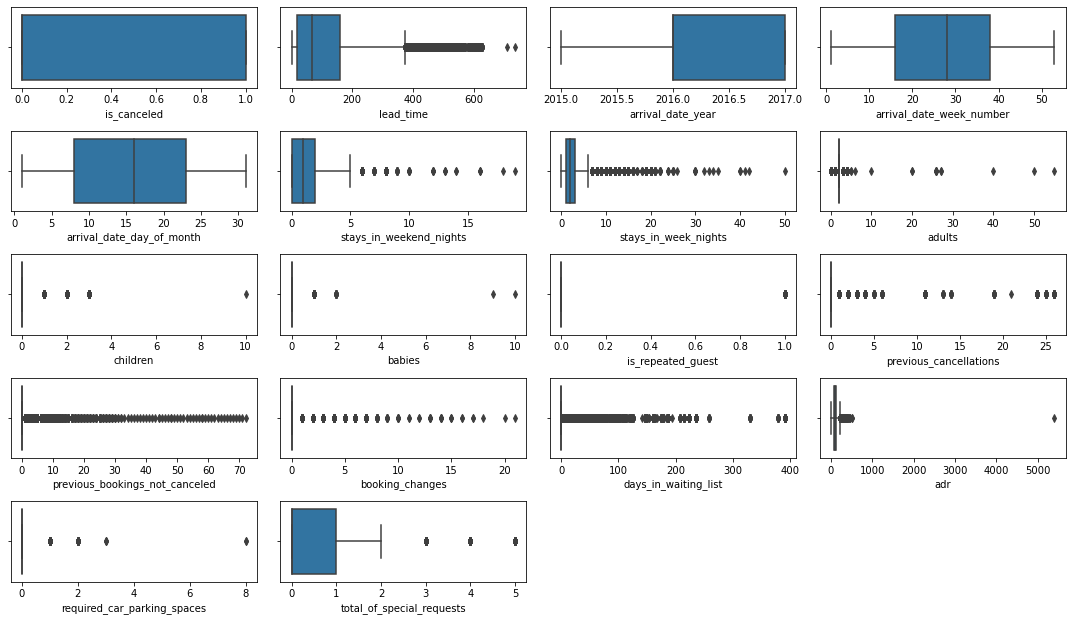

In [95]:
#Now check for outliers
plt.figure(figsize = (15, 10))
x = 1 

for column in df.describe().columns:
    plt.subplot(6,4,x)
    sns.boxplot(df[column])
    x+=1
    
plt.tight_layout()

**Adult Abnormal Value

In [96]:
# since it's impossible to have 0 adults to book a hotel room 
df.drop(labels = df[df['adults'] == 0].index, axis = 0, inplace = True)

**ADR Abnormal Value

In [97]:
# there are a value of a adr columns that below 0 since it is impossible for hotel to owe money to the guest 
df = df.drop(df[df.adr < 0].index)


In [98]:
df = df.drop(df[df.adr > 5000].index)


### Dataset Preparation

In [99]:
#getting the total stays column by adding the weekday stays and the weekend stays
df['total_stays'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_stays
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03,2


In [100]:
# total guest of the hotel booking by adding the adults, children and babies
df['guests'] = df['adults'] + df['children'] + df['babies']
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_stays,guests
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,0,2.0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,0,2.0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,1,1.0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,1,1.0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03,2,2.0


In [101]:
df['kids'] = df['children'] + df['babies']
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_stays,guests,kids
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,0,2.0,0.0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,0,2.0,0.0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,1,1.0,0.0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,1,1.0,0.0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03,2,2.0,0.0


In [102]:
df['meal'].unique()


array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [103]:
#Replace Undefined with SC
df['meal'] = df['meal'].str.replace('Undefined', 'SC')
df['meal'].unique()

array(['BB', 'FB', 'HB', 'SC'], dtype=object)

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118985 entries, 0 to 119389
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118985 non-null  object 
 1   is_canceled                     118985 non-null  int64  
 2   lead_time                       118985 non-null  int64  
 3   arrival_date_year               118985 non-null  int64  
 4   arrival_date_month              118985 non-null  object 
 5   arrival_date_week_number        118985 non-null  int64  
 6   arrival_date_day_of_month       118985 non-null  int64  
 7   stays_in_weekend_nights         118985 non-null  int64  
 8   stays_in_week_nights            118985 non-null  int64  
 9   adults                          118985 non-null  int64  
 10  children                        118985 non-null  float64
 11  babies                          118985 non-null  int64  
 12  meal            

### Dropping Redundant columns

In [105]:
df = df.drop(columns = ['stays_in_weekend_nights', 'stays_in_week_nights', 'babies', 'adults','children'], axis=1)


In [106]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_stays,guests,kids
0,Resort Hotel,0,342,2015,July,27,1,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,0,2.0,0.0
1,Resort Hotel,0,737,2015,July,27,1,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,0,2.0,0.0
2,Resort Hotel,0,7,2015,July,27,1,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,1,1.0,0.0
3,Resort Hotel,0,13,2015,July,27,1,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,1,1.0,0.0
4,Resort Hotel,0,14,2015,July,27,1,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03,2,2.0,0.0


### Feature Encoding

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118985 entries, 0 to 119389
Data columns (total 28 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118985 non-null  object 
 1   is_canceled                     118985 non-null  int64  
 2   lead_time                       118985 non-null  int64  
 3   arrival_date_year               118985 non-null  int64  
 4   arrival_date_month              118985 non-null  object 
 5   arrival_date_week_number        118985 non-null  int64  
 6   arrival_date_day_of_month       118985 non-null  int64  
 7   meal                            118985 non-null  object 
 8   country                         118985 non-null  object 
 9   market_segment                  118985 non-null  object 
 10  distribution_channel            118985 non-null  object 
 11  is_repeated_guest               118985 non-null  int64  
 12  previous_cancell

In [108]:
#Applying label encoding for categorical features to find the correlation
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1=df.copy()
df1['hotel'] = le.fit_transform(df1['hotel'])
df1['arrival_date_month'] = le.fit_transform(df1['arrival_date_month'])
df1['meal'] = le.fit_transform(df1['meal'])
df1['deposit_type'] = le.fit_transform(df1['deposit_type'])
df1['customer_type'] = le.fit_transform(df1['customer_type'])
df1['market_segment'] = le.fit_transform(df1['market_segment'])
df1['distribution_channel'] = le.fit_transform(df1['distribution_channel'])
df1['reserved_room_type'] = le.fit_transform(df1['reserved_room_type'])
df1['assigned_room_type']= le.fit_transform(df1['assigned_room_type'])
df1['reservation_status'] = le.fit_transform(df1['reservation_status'])
df1['reservation_status_date'] = le.fit_transform(df1['reservation_status_date'])
df1['country'] = le.fit_transform(df1['country'])

In [109]:
cor=df1.corr()

<AxesSubplot:>

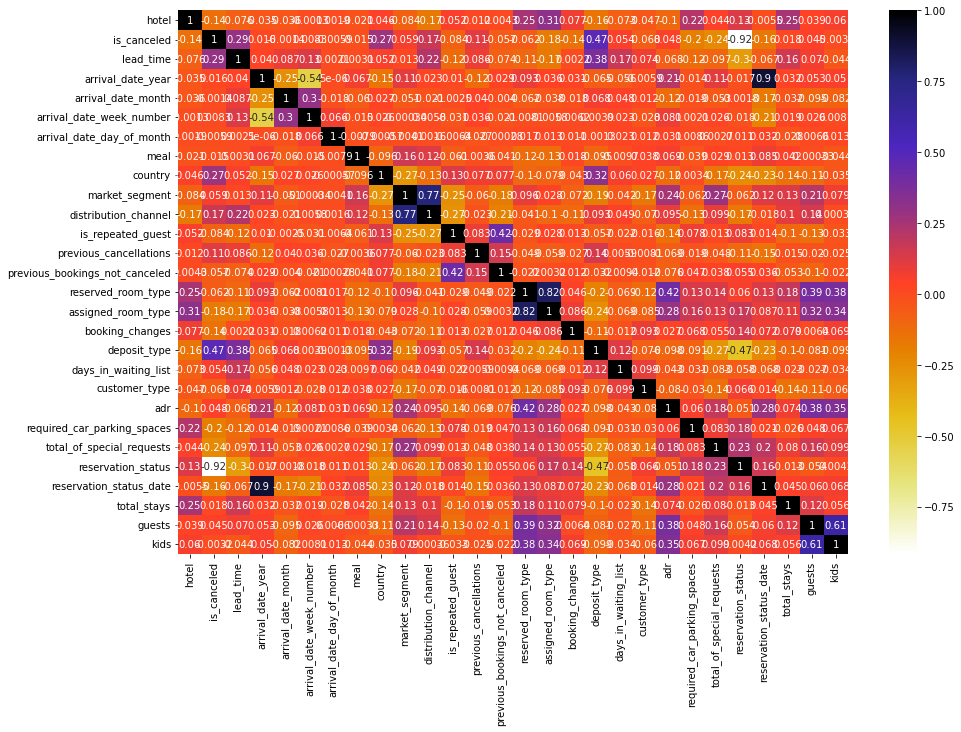

In [110]:
plt.figure(figsize = (15,10))
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)

In [111]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [112]:
corr_features = correlation(df1, 0.8)
len(set(corr_features))

3

In [113]:
corr_features

{'assigned_room_type', 'reservation_status', 'reservation_status_date'}

In [114]:
cat_feature = [feature for feature in df.columns if df[feature].dtype == 'object']
print("Number of Categorical Features are : ",len(cat_feature))

Number of Categorical Features are :  12


In [115]:
for feature in cat_feature:
    print("{} : {} labels ".format(feature,len(df[feature].unique())))

hotel : 2 labels 
arrival_date_month : 12 labels 
meal : 4 labels 
country : 177 labels 
market_segment : 8 labels 
distribution_channel : 5 labels 
reserved_room_type : 9 labels 
assigned_room_type : 11 labels 
deposit_type : 3 labels 
customer_type : 4 labels 
reservation_status : 3 labels 
reservation_status_date : 926 labels 


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118985 entries, 0 to 119389
Data columns (total 28 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118985 non-null  object 
 1   is_canceled                     118985 non-null  int64  
 2   lead_time                       118985 non-null  int64  
 3   arrival_date_year               118985 non-null  int64  
 4   arrival_date_month              118985 non-null  object 
 5   arrival_date_week_number        118985 non-null  int64  
 6   arrival_date_day_of_month       118985 non-null  int64  
 7   meal                            118985 non-null  object 
 8   country                         118985 non-null  object 
 9   market_segment                  118985 non-null  object 
 10  distribution_channel            118985 non-null  object 
 11  is_repeated_guest               118985 non-null  int64  
 12  previous_cancell

In [117]:
df = df.drop(columns = ['hotel','country', 'reservation_status_date','assigned_room_type','reservation_status','arrival_date_year','arrival_date_week_number'], axis=1)
df1 = df1.drop(columns = ['hotel','country', 'reservation_status_date','assigned_room_type','reservation_status','arrival_date_year','arrival_date_week_number'], axis=1)


In [118]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118985 entries, 0 to 119389
Data columns (total 21 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   is_canceled                     118985 non-null  int64  
 1   lead_time                       118985 non-null  int64  
 2   arrival_date_month              118985 non-null  int64  
 3   arrival_date_day_of_month       118985 non-null  int64  
 4   meal                            118985 non-null  int64  
 5   market_segment                  118985 non-null  int64  
 6   distribution_channel            118985 non-null  int64  
 7   is_repeated_guest               118985 non-null  int64  
 8   previous_cancellations          118985 non-null  int64  
 9   previous_bookings_not_canceled  118985 non-null  int64  
 10  reserved_room_type              118985 non-null  int64  
 11  booking_changes                 118985 non-null  int64  
 12  deposit_type    

### Applying Feature Selection to get the top 15 important features from the Random Forest Model


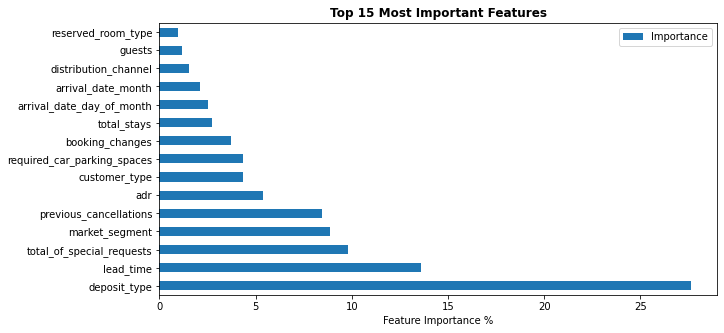

In [119]:
X = df1.drop(['is_canceled'], axis = 1)
y = df1['is_canceled']

from imblearn.over_sampling import SMOTE
# sm = SMOTE(random_state=42)
# X, y = sm.fit_resample(X, y)

#Train and test split data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 42,stratify = y,test_size = 0.30)

from sklearn.ensemble import RandomForestClassifier
rf_model=RandomForestClassifier(max_depth = 15,min_samples_leaf= 1, min_samples_split = 2,n_estimators = 200)


plt.figure(figsize =(10,5))
rf_model.fit(X_train,y_train)
feature_imp = pd.Series(rf_model.feature_importances_*100 ,index = X.columns)
feature_imp.nlargest(15).plot(kind = 'barh',label = 'Importance')
plt.legend()
plt.title('Top 15 Most Important Features',weight = 'bold')
plt.xlabel('Feature Importance %')
plt.show()

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118985 entries, 0 to 119389
Data columns (total 21 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   is_canceled                     118985 non-null  int64  
 1   lead_time                       118985 non-null  int64  
 2   arrival_date_month              118985 non-null  object 
 3   arrival_date_day_of_month       118985 non-null  int64  
 4   meal                            118985 non-null  object 
 5   market_segment                  118985 non-null  object 
 6   distribution_channel            118985 non-null  object 
 7   is_repeated_guest               118985 non-null  int64  
 8   previous_cancellations          118985 non-null  int64  
 9   previous_bookings_not_canceled  118985 non-null  int64  
 10  reserved_room_type              118985 non-null  object 
 11  booking_changes                 118985 non-null  int64  
 12  deposit_type    

In [121]:
df= df.drop(['meal','kids','is_repeated_guest','previous_bookings_not_canceled','days_in_waiting_list'],axis = 1)


In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118985 entries, 0 to 119389
Data columns (total 16 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   is_canceled                  118985 non-null  int64  
 1   lead_time                    118985 non-null  int64  
 2   arrival_date_month           118985 non-null  object 
 3   arrival_date_day_of_month    118985 non-null  int64  
 4   market_segment               118985 non-null  object 
 5   distribution_channel         118985 non-null  object 
 6   previous_cancellations       118985 non-null  int64  
 7   reserved_room_type           118985 non-null  object 
 8   booking_changes              118985 non-null  int64  
 9   deposit_type                 118985 non-null  object 
 10  customer_type                118985 non-null  object 
 11  adr                          118985 non-null  float64
 12  required_car_parking_spaces  118985 non-null  int64  
 13 

In [123]:
dummies = pd.get_dummies(df.arrival_date_month,prefix='arrival_date_month')
df = pd.concat([df,dummies],axis='columns')
df = df.drop('arrival_date_month',axis='columns')

In [124]:
dummies = pd.get_dummies(df.market_segment,prefix='market_segment')
df = pd.concat([df,dummies],axis='columns')
df = df.drop('market_segment',axis='columns')

In [125]:
dummies = pd.get_dummies(df.distribution_channel,prefix='distribution_channel')
df = pd.concat([df,dummies],axis='columns')
df = df.drop('distribution_channel',axis='columns')

In [126]:
dummies = pd.get_dummies(df.reserved_room_type,prefix='reserved_room_type')
df = pd.concat([df,dummies],axis='columns')
df = df.drop('reserved_room_type',axis='columns')

In [127]:
dummies = pd.get_dummies(df.deposit_type,prefix='deposit_type')
df = pd.concat([df,dummies],axis='columns')
df = df.drop('deposit_type',axis='columns')

In [128]:
dummies = pd.get_dummies(df.customer_type,prefix='customer_type')
df = pd.concat([df,dummies],axis='columns')
df = df.drop('customer_type',axis='columns')

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118985 entries, 0 to 119389
Data columns (total 51 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   is_canceled                     118985 non-null  int64  
 1   lead_time                       118985 non-null  int64  
 2   arrival_date_day_of_month       118985 non-null  int64  
 3   previous_cancellations          118985 non-null  int64  
 4   booking_changes                 118985 non-null  int64  
 5   adr                             118985 non-null  float64
 6   required_car_parking_spaces     118985 non-null  int64  
 7   total_of_special_requests       118985 non-null  int64  
 8   total_stays                     118985 non-null  int64  
 9   guests                          118985 non-null  float64
 10  arrival_date_month_April        118985 non-null  uint8  
 11  arrival_date_month_August       118985 non-null  uint8  
 12  arrival_date_mon

In [130]:
df.shape

(118985, 51)

In [131]:
df.to_csv('hotel_cleaned_data.csv' ,index= False)
